# Universidade Federal do Rio Grande do Sul (UFRGS)
### Programa de Pós-Graduação em Engenharia Civil/Estruturas (PPGEC)   
### PEC00025: Introdução à Teoria de Vibrações
### Aluno: Francisco da Silva Brandão (00312120)

### *Trabalho 2.2: Resposta de um sistema de múltiplos GDL submetido a um impulso*


[1.   Objetivo ](#section_1)

[2.   Matriz de massa da estrutura](#section_2)

[3.   Matriz de rigidez da estrutura](#section_3)

[4.   Cálculo das 4 primeiras frequências naturais e modos de vibração](#section_4)

[5.   Condição de velocidade inicial aplicada](#section_5)

[6.   Resposta a uma velocidade inicial aplicada](#section_6)

[7.   Amortecimento](#section_7) 

[8.   Considerações finais](#section_8) 

In [15]:
# Importando os mudulos Python necessários a esta análise

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.linalg as sp

## 1. Objetivo <a name="section_1"></a> 

Este trabalho objetiva calcular a resposta de um sistema de múltiplos graus de liberdade submetido a impulso. A estrutura deste trabalho é apresentada na Figura 1. O pórtico foi modelado no software [_Ftool_](https://www.ftool.com.br/Ftool/) e apresenta uma altura de 42m, com espaçamento entre os pavimentos igual a 3m, ou seja, o total de nós ativos é 14, o que gera 14 graus de liberdade na horizontal e uma matriz 14x14. A base da estrutura é quadrada com 4m de lado.



<img src="data1/port.jpeg" width="280px"/>

Figura 1- Seção em planta e vista transversal do prédio

## 2. Matriz de massa da estrutura <a name="section_2"></a> 

A matriz de massa da presente estrutura é uma matriz diagonal e foi obtida calculado-se o volume do prédio, multiplicando-o por uma estmativa de peso por $m^3$ e dividindo o valor encontrado pelo número de pavimentos. Considerou-se $ 400 kg/m^3$.

In [2]:
cp = 400       # estimativa da carga por cada pavimento (kg/m^3)
npe = 14       # número de pavimentos da estrutura
be = 4         # largura da base da estrutura (m)
he = 42        # altura da estrutura (m)

Algumas considerações sobre o peso da estrutura foram feitas:

1- O peso dos pilares foi desconsiderado, assim, toda a massa concentra-se nas lajes;  

2- cada nó da estrutura apresenta 3GDL, entretanto, apenas os deslocamentos na horizontal foram considerados;

In [3]:
mp = ((be**2)*he*cp)/npe     # Carga por pavimento que está na diagonal da matriz de massa (kg)

print(mp)

19200.0



O valor calculado para massa de cada pavimento foi de 19200 kg, porém decidiu-se arrendondar para $2,0x10^4 kg$. Assim, a matriz de massa é mostrada a seguir:

In [4]:
M1 = np.array ([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]])*1e4

## 3. Matriz de rigidez da estrutura <a name="section_3"></a> 

Para obter a matriz de rigidez da presente estrutura foi necessário utilizar o método das forças que foi aplicado da seguinte forma.

1- Aplicou-se uma força de $1kN$ em cada um dos 14 nós da estrutura e coletaram-se os deslocamentos obtidos no nó de aplicaçção e nos demais;

2- Os deslocamentos coletados foram divididos pela força aplicada e organizados em colunas para compor a matriz de flexibilidade da estrutura, através da seguinte notaçao:

$$ \vec{u} = \mathbf{H} \vec{F}$$

A seguir é mostrada a matriz de flexibilidade da estrutura.

In [5]:
H1 = np.array([[1.3300, 1.2070, 1.0810, 0.9570, 0.8350, 0.7180, 0.6050, 0.4980, 0.3970, 0.3050, 0.2210, 0.1460, 0.0820, 0.0310],
              [1.2070, 1.1220, 1.0120, 0.8990, 0.7870, 0.6790, 0.5740, 0.4740, 0.3800, 0.2930, 0.2130, 0.1420, 0.0800, 0.0300],
              [1.0810, 1.0120, 0.9380, 0.8400, 0.7390, 0.6400, 0.5430, 0.4510, 0.3630, 0.2810, 0.2050, 0.1380, 0.0790, 0.0300],
              [0.9570, 0.8990, 0.8400, 0.7780, 0.6910, 0.6010, 0.5130, 0.4270, 0.3460, 0.2690, 0.1980, 0.1330, 0.0770, 0.0290],
              [0.8350, 0.7870, 0.7390, 0.6910, 0.6390, 0.5620, 0.4820, 0.4040, 0.3280, 0.2570, 0.1900, 0.1290, 0.0750, 0.0290],
              [0.7180, 0.6790, 0.6400, 0.6010, 0.5620, 0.5190, 0.4510, 0.3800, 0.3110, 0.2450, 0.1820, 0.1250, 0.0730, 0.0280],
              [0.6050, 0.5740, 0.5430, 0.5130, 0.4820, 0.4510, 0.4160, 0.3560, 0.2940, 0.2330, 0.1750, 0.1200, 0.0710, 0.0280],
              [0.4980, 0.4740, 0.4510, 0.4270, 0.4040, 0.3800, 0.3560, 0.3290, 0.2760, 0.2210, 0.1670, 0.1160, 0.0690, 0.0270],
              [0.3970, 0.3800, 0.3630, 0.3460, 0.3280, 0.3110, 0.2940, 0.2760, 0.2550, 0.2080, 0.1590, 0.1120, 0.0670, 0.0270],
              [0.3050, 0.2930, 0.2810, 0.2690, 0.2570, 0.2450, 0.2330, 0.2210, 0.2080, 0.1920, 0.1510, 0.1070, 0.0650, 0.0260],
              [0.2210, 0.2130, 0.2050, 0.1980, 0.1900, 0.1820, 0.1750, 0.1670, 0.1590, 0.1510, 0.1390, 0.1030, 0.0630, 0.0260],
              [0.1460, 0.1420, 0.1380, 0.1330, 0.1290, 0.1250, 0.1200, 0.1160, 0.1120, 0.1070, 0.1030, 0.0940, 0.0610, 0.0250],
              [0.0820, 0.0800, 0.0790, 0.0770, 0.0750, 0.0730, 0.0710, 0.0690, 0.0670, 0.0650, 0.0630, 0.0610, 0.0550, 0.0250],
              [0.0310, 0.0300, 0.0300, 0.0290, 0.0290, 0.0280, 0.0280, 0.0270, 0.0270, 0.0260, 0.0260, 0.0250, 0.0250, 0.0200]])*1e-6       

Prosseguindo, a matriz de rigidez foi obtida invertendo a matriz de flexibilidade $\mathbf{H}^{-1} = \mathbf{K}$, como mostra o comando em Python.

In [6]:
K1 = np.linalg.inv (H1)

## 4. Cálculo das 4 primeiras frequências naturais e modos de vibração <a name="section_4"></a> 

A obtenção das 4 primeiras frequências naturais da estrutura em questão foi obtida atravás da biblioteca Scipy na qual resolveu-se o problema de autovetor e autovalor: $$ \mathbf{K} \, \vec{\varphi}_k = \omega_k^2 \, \mathbf{M} \, \vec{\varphi}_k  $$  

que possui tantas soluções quanto a ordem das matrizes, que é também o número de graus de liberdade do sistema. Cada solução é um par $\left( \omega_k, \vec{\varphi}_k \right)$.



In [7]:
# resolvendo o problema de autovetores e autovalores

w21, phi1 = sp.eig(K1, M1)

# colocando os autovalores em ordem crescente

iw   = w21.argsort()
w21  = w21[iw]
phi1 = phi1[:,iw]

# convertendos os autovalores em frequências (Hz)

wk1  = np.sqrt(np.real(w21)) 
fk1  = wk1/(2*np.pi)

Desta forma, as frequências naturais da estruturas são mostradas a seguir, onde as 4 primeiras são plotadas abaixo:

In [9]:
# frequências naturais organizadas em ordem crescente (Hz)

print(fk1)
print('As 4 primeiras frequências são:\n', 'f1=', fk1[0], 'Hz','\n', 'f2=', fk1[1], 'Hz''\n','f3=', fk1[2], 'Hz''\n', 'f4=',fk1[3], 'Hz')

[ 0.45779136  1.62260221  3.19075549  4.6348883   6.16563169  7.56042674
  9.1781154  10.60568488 11.63909178 13.24026802 14.33579568 14.79616744
 17.08870426 18.60934577]
As 4 primeiras frequências são:
 f1= 0.45779135519942665 Hz 
 f2= 1.6226022076195097 Hz
 f3= 3.1907554928682824 Hz
 f4= 4.634888302231905 Hz


Agora plotam-se os 4 primeiros modos de vibração da estrutura:

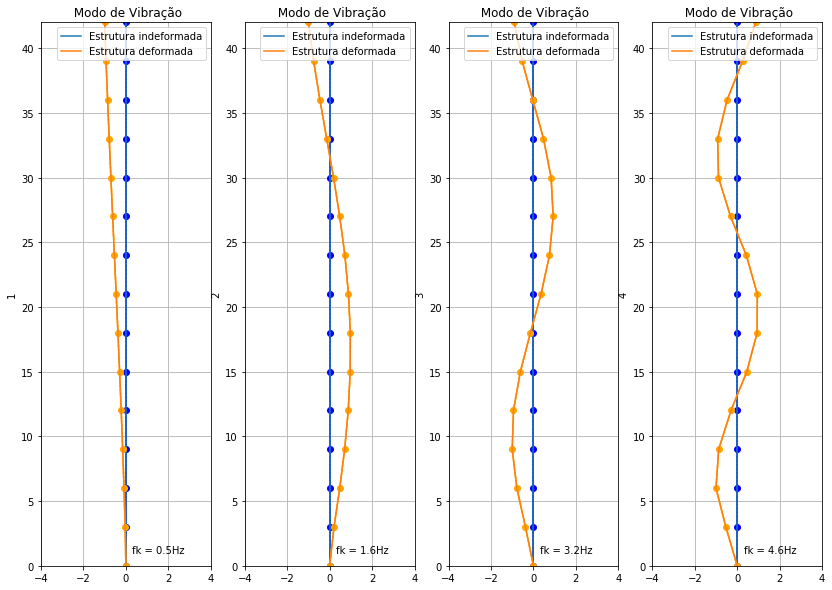

In [8]:
# plotando a estrutura indeformada e deformada em seus 4 modos de vibração calculados

plt.figure(1, figsize=(14,10))

hp = np.arange(45,-3,-3)        # altura do prédio usada para plotar a estrutura indeformada          
x = np.zeros(hp.shape)          # plotar a estrutura indeformada

for k in range(4):
    pk = np.zeros(16)
    pk[1:-1] = phi1[:,k]
    pk /= np.max(np.abs(pk))        
    
    plt.subplot(1,4,k+1)
    plt.plot(x, hp, color='blue')
    plt.plot(x, hp, 'go:', color='blue')
    plt.title(" Modo de Vibração")
    plt.plot(x, hp, label = 'Estrutura indeformada')
    plt.legend()
    
    plt.plot(pk, hp, color='orange')
    plt.plot(pk, hp, 'go:', color='orange')
    plt.plot(pk, hp, label = 'Estrutura deformada')
    plt.legend()
    
    plt.xlim(-4, 4);  plt.ylabel(str(k+1));
    plt.ylim( 0.0, he);
    plt.text( 0.3, 1.0, 'fk = {0:3.1f}Hz'.format(fk1[k]));
    plt.grid(True)

## 5. Condição de velocidade inicial aplicada <a name="section_5"></a> 

Para aplicar uma velocidade inicial no topo da estrutura, aplicou-se primeiramente uma força de $30 kN$ conforme o gráfico da Figura 2 a seguir, em função de um $t_d$. O $t_d$ foi estimado em função da frequência natural do 4º modo, a qual dará o maior período.


<img src="data1/impulso.jpeg" width="350px"/>

Figura 2- Aplicação da força

Calculando a velocidade inicial tem-se:

In [11]:
f_4 = fk1[3]            # maior frequência dentre as 4 dos 4 modos, pedidos no trabalho (Hz)
F0 = 30000              # força aplicada no nó do topo (N)
Tn = 1/f_4              # período em função da frequência do 4º modo (s)
td = Tn/4               # td em função do perído (s)
m = 20000               # massa do pavimento que foi arrendondada para 2,0𝑥10^4 𝑘𝑔
v0 = (F0*td)/m          # mvelocidade inicial aplicada no topo (m/s)

v0h=[v0, 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

uo_v =np.zeros(14)

print('A frequência do 4° modo é', f_4, 'Hz')
print('A velocidade inicial no topo do prédio', v0h[0], 'm/s')

A frequência do 4° modo é 4.634888302231905 Hz
A velocidade inicial no topo do prédio 0.08090809865243587 m/s


## 6. Resposta a uma velocidade inicial aplicada <a name="section_6"></a> 

Para calcular a resposta $u(t)$ resolveu-se equação de resposta não amortecida à condições iniciais, considerando $v_0$ . Para isto calculou-se o vetor $\vec{\varphi}^T$, a massa modal $M_i$ e considerou-se o ângulo $\theta_i = -\pi/2$. Utilizou-se um tempo de $20s$ para plotar $u(t)$. O cálculo é mostrado a seguir e logo após, o gráfico $u(t)$.


O máximo deslocamento da estrutura no primeiro modo é: 2.8799182920789463 cm


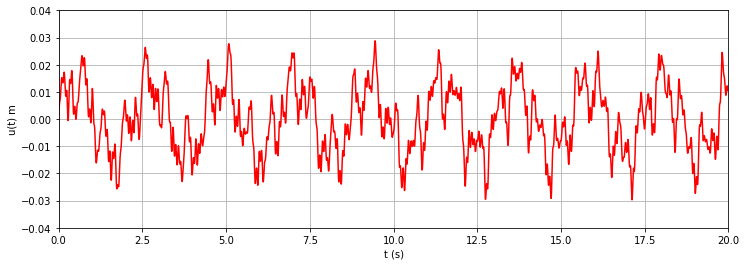

In [12]:
phiT = phi1.transpose()

tetai =  np.pi/2                                # angulo pi/2
UMAX =np.zeros(14)                              # vetor dos deslocamentos máximos

for k in range (14):
    
    Mi=np.dot(np.dot(phiT[k], M1), phi1[k])      # cálculo da massa modal Mi através da multiplicação de matrizes
    umax = -(np.dot(np.dot(phiT[k], M1),v0h)) /  (wk1[k] * np.sin(-tetai)* Mi) #cálculo das amplitudes máximas
   
    UMAX[k]=umax
    

t = np.linspace(0,20,5000)   #vetor representando o tempo de 20s.
uk = np.zeros((14, 5000))    # criando uma matriz 14x5000 para receber os valores de deslocamentos

for k in range(14):
    
            uk[k,:] = UMAX[k]*np.cos(wk1[k]*t - tetai)

u = np.dot(phi1, uk)  #produto dos autovalores pela matriz de deslocamentos

plt.figure(2, figsize=(12,4))
plt.plot(t,u[0,:], color='red') #plotando o 14º nó (maior deslocamento)
plt.xlim( 0.0, 20.0); plt.xlabel("t (s)");
plt.ylim(-0.04,0.04);  plt.ylabel("u(t) m");
plt.grid(True)

print ("O máximo deslocamento da estrutura no primeiro modo é:", (max (u[0])*100), 'cm')

## 7. Amortecimento <a name="section_7"></a> 

Calculou-se o amortecimento para todos os modos de vibração sendo que para os dois primeiros utilizou-se $0,01$. Em seguida foram calculados os parâmetros $\alpha_0$ e $\alpha_1$, consideando as duas primeiras frequêcnias naturais.


In [13]:
zeta =np.zeros(14)    # vetor para calcular os zeta
zeta[0] = 0.01        # zeta = 1% para as duas prmeiras frequências
zeta[1] = 0.01        # zeta = 1% para as duas prmeiras frequências

# calculando alpa zero e alfa 1 considerando zeta = 1% para as duas prmeiras frequências da estrutura

alfa1=(zeta[1]*wk1[1]-zeta[0]*wk1[0])/((wk1[1]**2)+(wk1[1]**2))  # calculando alfa 1
alfa0=2*zeta[0]*wk1[0]-alfa1*(wk1[0]**2)                         # calculando alfa 0

for k in range (12):
    
    zeta[k+2] = (alfa0/(2*wk1[k+2]))+(alfa1*wk1[k+2]/2)


print('Alfa zero vale', alfa0)
print('Alfa 1 vale', alfa1)

print('Os 14 valores de amortecimentos são:', zeta)

Alfa zero vale 0.05461492034202368
Alfa 1 vale 0.00035206383808844387
Os 14 valores de amortecimentos são: [0.01       0.01       0.0048912  0.00606407 0.00752434 0.00893699
 0.0106249  0.01214012 0.01324672 0.01497253 0.01615915 0.0166589
 0.01915514 0.02081625]


Plotando um gráfico de zeta pelas frequências da estrutura, obtem-se a seguinte figura:

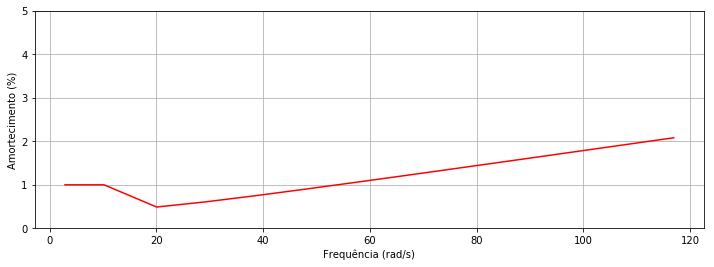

In [14]:
plt.figure(3, figsize=(12,4))
plt.plot(wk1,zeta*100, color='red'); plt.xlabel('Frequência (rad/s)'); plt.ylabel('Amortecimento (%)')
plt.ylim(0,5)
plt.grid(True)

## 8. Considerações finais <a name="section_8"></a> 

O presente trabalhou objetivou calcular a resposta de uma estrutura a uma condição inicial de velocidade aplicada no topo da estrutura. Verificou-se que a frequência fundamental da estrutura correspode a 0.457 Hz e que o máximo deslocamento encontrado na resposta $u(t)$ para este modo foi de 2,87 cm.  
Ao final, ainda mostram-se os coeficientes $\alpha_0$ e $\alpha_1$ para as duas primeiras frequências e um gráfico dos amortecimentos para as 14 frequências.